# Programming-for-Data-Analysis-Project-2021

Programming-for-Data-Analysis-Project-2021-V6.ipynb Table of Contents

1. Introduction
    - 1.1 Project Statement
    - 1.2 Why Simulate Data?
    - 1.3 What Real-world data is to be simulated?
    - 1.4 What to recreate
2. Set up
    - 2.1 Imports
    - 2.2 The Framingham Heart Data
    - 2.3 The Framingham Heart Data Overview
    - 2.4 Select dataset to simulate
    - 2.5 What is the distribution?
    - 2.6 How to reproduce?
    - 2.7 Mean and Standard Deviation By Age Group
    - 2.8 Count and percentage by value for a by Age
3. Simulate the Framingham Dataset
    - 3.1 Create new Dataframe
    - 3.2 Use Random Choice to populate Age
    - 3.3 Create a function for 'Systolic Blood Pressure' 'Diastolic Blood Pressure' 'Glucose Levels'
    - 3.4 Populate 'Hypertensive' 'Diabetes'
4. Conclusion
5. References 

# 1. Introduction

## 1.1 Project Statement

- Create a Jupyter notebook
- Create a data set by simulating a real-world phenomenon of my choosing 
- Model and synthesise such data using Python (suggest to use the numpy.random package for this purpose)
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## 1.2 Why Simulate Data?

A computer simulation is an application designed to imitate a real-life situation with the advantages of:

- It can avoid danger and loss of life.
- Conditions can be varied and outcomes investigated.
- Critical situations can be investigated without risk.
- It is cost-effective.
- Simulations can be sped up so behaviour can be studied easily over a long period of time.
- Simulations can be slowed down to study behaviour more closely [1]

The project is to simulate a real-world phenomenon.

## 1.3 What Real-world data is to be simulated?

The choice for this project is to recreate the data from the Framingham Heart Study. The study is now considered one of the longest, most important epidemiological studies in medical history. In the 1960s, the study demonstrated the role cigarette smoking plays in the development of heart disease. Those findings helped to fuel the first anti-smoking campaigns of that era. The study provided researchers with knowledge of how dietary fat can increase the risk of heart disease. It showed a link between cholesterol levels in the blood and an individual's risk for developing heart disease. Later, Framingham data also demonstrated the beneficial role of high-density lipoprotein (HDL) cholesterol and the negative consequences of low-density lipoprotein (LDL) cholesterol. This program has helped to educate physicians, patients, and the public about the dangers of high blood cholesterol and to bring about reductions in Americans' blood cholesterol levels. [2]

## 1.4 What to recreate

The challenge with the Project Notebook is to pick the real-world phenomenon, I decide to simulate the data from the Framingham Heart Study. After researching and developing the Notebook the simulated data should be based on Age, Systolic Blood Pressure, Hypertensive, Diastolic Blood Pressure, Glucose Levels and Diabetes. Age is the main reference point as the Framingham Heart Study, which followed patients for 30 years, that systolic blood pressure (SBP) shows a continuous increase between the ages of 30 and 84 years or over. [14]

To develop a further understanding of the data I found the levels of over 180 of Systolic Blood Pressure and over 120 Diastolic Blood Pressure that caused Hypertension. Hypertension is serious because people with the condition have a higher risk for heart disease and other medical problems than people with normal blood pressure. [20] I was also informed that glucose levels may be an important predictor of mortality in patients with established cardiovascular disease. [19]

***What Does the Systolic Blood Pressure Number Mean?***

When your heart beats, it squeezes and pushes blood through your arteries to the rest of your body. This force creates pressure on those blood vessels, and that's your systolic blood pressure. [17]

Here’s how to understand your systolic blood pressure number:

    Normal: Below 120
    Elevated: 120-129
    Stage 1 high blood pressure (also called hypertension): 130-139
    Stage 2 hypertension: 140 or more
    Hypertensive crisis: 180 or more.

***What Does the Diastolic Blood Pressure Number Mean?***

The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. [17]

This is what your diastolic blood pressure number means:

    Normal: Lower than 80
    Stage 1 hypertension: 80-89
    Stage 2 hypertension: 90 or more
    Hypertensive crisis: 120 or more.  

***What Does the Glucose Number Mean?***

Blood sugar, or glucose, is the main sugar found in your blood. It comes from the food you eat and is your body's main source of energy. Your blood carries glucose to all of your body's cells to use for energy. Diabetes is a disease in which your blood sugar levels are too high [18]

A growing body of evidence suggests that glucose may be an important predictor of mortality in patients with established cardiovascular disease [19]

This is what your Glucose Level number means:

    Normal: Lower 100 mg/dl
    Impaired : 101–126 mg/dl
    Diabetic : 126 mg/dl or more


***
# 2. Set up

- Import the python modules to run the notebook
- Read the Framingham Heart Study Data
    - TenYearCHD (10-year risk of coronary heart disease) identify the variables and the strength of a relationship with the other variables.
    - Simulate 6 of 15 variables with the highest correlation of 10% and above
    - Descriptive Analysis of the 6 variable
    - Remove row with missing values
    - Rename the headers
    - Create a Histogram and Boxplot on the data 
    - Identify the numpy.random distribution for the variables
- Group the rows and columns by 'Age' groups
    - Mean and Standard deviation for each Group for 
        - Systolic Blood Pressure, Diastolic Blood Pressure, Glucose Levels
- Recreate the Age array
    - Identify the probabilities of occurrence for each element

## 2.1 Imports

Import the modules required for the project notebook

In [254]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

## 2.2 The Framingham Heart Data
Import the Framingham Heart Data using the pandas read_ csv function. 

In [255]:
# Import data from data folder [15]
df = pd.read_csv("data/framingham.csv")

## 2.3 The Framingham Heart Data Overview

The Dataframe has 16 rows for the project we require a minimum of four different variables. To select the variables required for the project a correlation matrix investigates the dependence between multiple variables at the same time. It shows symmetric tabular data where each row and column represent a variable, and the corresponding value is the correlation coefficient denoting the strength of a relationship between these two variables. [5]

Using TenYearCHD (10-year risk of coronary heart disease(CHD)) we are going to identify the variables and the strength of a relationship with the other variables.

In [256]:
# Correlation matrix [9]

print('Get correlation of variables with TenYearCHD')
FHS_correlation = df.corr()['TenYearCHD']
corr_FHS = FHS_correlation.abs().sort_values(ascending=False)[1:]
round(corr_FHS,2)

Get correlation of variables with TenYearCHD


age                0.23
sysBP              0.22
prevalentHyp       0.18
diaBP              0.15
glucose            0.13
diabetes           0.10
male               0.09
BPMeds             0.09
totChol            0.08
BMI                0.08
prevalentStroke    0.06
cigsPerDay         0.06
education          0.05
heartRate          0.02
currentSmoker      0.02
Name: TenYearCHD, dtype: float64

## 2.4 Select dataset to simulate

A new Dataframe is created using variables with the highest correlation of 10% and above. To test, if your object has the right type of data [11] in it the pandas head function returns the first 5 rows of data, this ensures we have selected more than the four variables required for the project. [9]

	'age','sysBP','prevalentHyp','diaBP','glucose', 'diabetes'

In [257]:
# Create a new dataframe with variables with the highest correlation
# Cut-off rate is 10% and above
# Return the first 5 rows of data

print('New dataframe with values with highest correlation')
Fram_data = df[['age','sysBP','prevalentHyp','diaBP','glucose', 'diabetes']] 
Fram_data.head(5)


New dataframe with values with highest correlation


,age,sysBP,prevalentHyp,diaBP,glucose,diabetes
0,39,106.0,0,70.0,77.0,0
1,46,121.0,0,81.0,76.0,0
2,48,127.5,0,80.0,70.0,0
3,61,150.0,1,95.0,103.0,0
4,46,130.0,0,84.0,85.0,0


The describe function to get the descriptive statistics to include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. [10] 

In [258]:
# Print the count, mean, std, min, max as well as lower, 50 and upper percentiles. 
# The lower (25) and upper (75) percentiles. The 50 percentile is the same as the median.
# This is to give an overview of the dataset including missing values [4]
Fram_data.describe()

,age,sysBP,prevalentHyp,diaBP,glucose,diabetes
count,4240.000000,4240.000000,4240.000000,4240.000000,3852.000000,4240.000000
mean,49.580189,132.354599,0.310613,82.897759,81.963655,0.025708
std,8.572942,22.033300,0.462799,11.910394,23.954335,0.158280
min,32.000000,83.500000,0.000000,48.000000,40.000000,0.000000
25%,42.000000,117.000000,0.000000,75.000000,71.000000,0.000000
50%,49.000000,128.000000,0.000000,82.000000,78.000000,0.000000
75%,56.000000,144.000000,1.000000,90.000000,87.000000,0.000000
max,70.000000,295.000000,1.000000,142.500000,394.000000,1.000000


The described function output displayed a count of 4240 except glucose displayed a count of 3852. To count the missing values in rows by applying the Pandas isna() function with the sum() function to get the counts of missing values per column in the data frame. [6] 

In [259]:
# Count missing values in rows [12]
print('Count Missing values in dataframe')
Fram_data.isna().sum()

Count Missing values in dataframe


age               0
sysBP             0
prevalentHyp      0
diaBP             0
glucose         388
diabetes          0
dtype: int64

As the project only requires more than one-hundred data points across at least four different variables, a decision to drop all rows containing the blank values.

In [260]:
# Drop rows with blank values [13]
print('Check cleaned data')
Fram_data.dropna(inplace = True)                   
Fram_data.describe() 

Check cleaned data


,age,sysBP,prevalentHyp,diaBP,glucose,diabetes
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,49.638629,132.452233,0.312825,82.933541,81.963655,0.027259
std,8.597086,22.128090,0.463704,11.968874,23.954335,0.162857
min,32.000000,83.500000,0.000000,48.000000,40.000000,0.000000
25%,42.000000,117.000000,0.000000,75.000000,71.000000,0.000000
50%,49.000000,128.000000,0.000000,82.000000,78.000000,0.000000
75%,57.000000,144.000000,1.000000,90.000000,87.000000,0.000000
max,70.000000,295.000000,1.000000,142.500000,394.000000,1.000000


The headers are renamed to make it more clear and provide names not to confuse the reader

In [261]:
# Rename the rows [9]
Fram_data = Fram_data.rename(columns = {
                            'age' : 'Age',
                            'sysBP' : 'Systolic Blood Pressure',
                            'prevalentHyp' : 'Hypertensive',
                            'diaBP' : 'Diastolic Blood Pressure',
                            'glucose' : 'Glucose Levels',
                            'diabetes' : 'Diabetes'})

Fram_data

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,39,106.0,0,70.0,77.0,0
1,46,121.0,0,81.0,76.0,0
2,48,127.5,0,80.0,70.0,0
3,61,150.0,1,95.0,103.0,0
4,46,130.0,0,84.0,85.0,0
...,...,...,...,...,...,...
4234,51,126.5,0,80.0,68.0,0
4235,48,131.0,0,72.0,86.0,0
4237,52,133.5,0,83.0,107.0,0
4238,40,141.0,1,98.0,72.0,0


# 2.5 What is the distribution?

The distribution of the data using Histograms and Boxplots show the following: 

Systolic Blood Pressure

    - Normal Distribution
    - Positive Skew (Right Skewed distribution)
    - Outliers above the upper quartile

Diastolic Blood Pressure

    - Normal Distribution

Glucose Levels

    - Normal Distribution
    - Positive Skew (Right Skewed distribution)
    - Many outliers the upper quartile

Age

    - Uniform Distribution

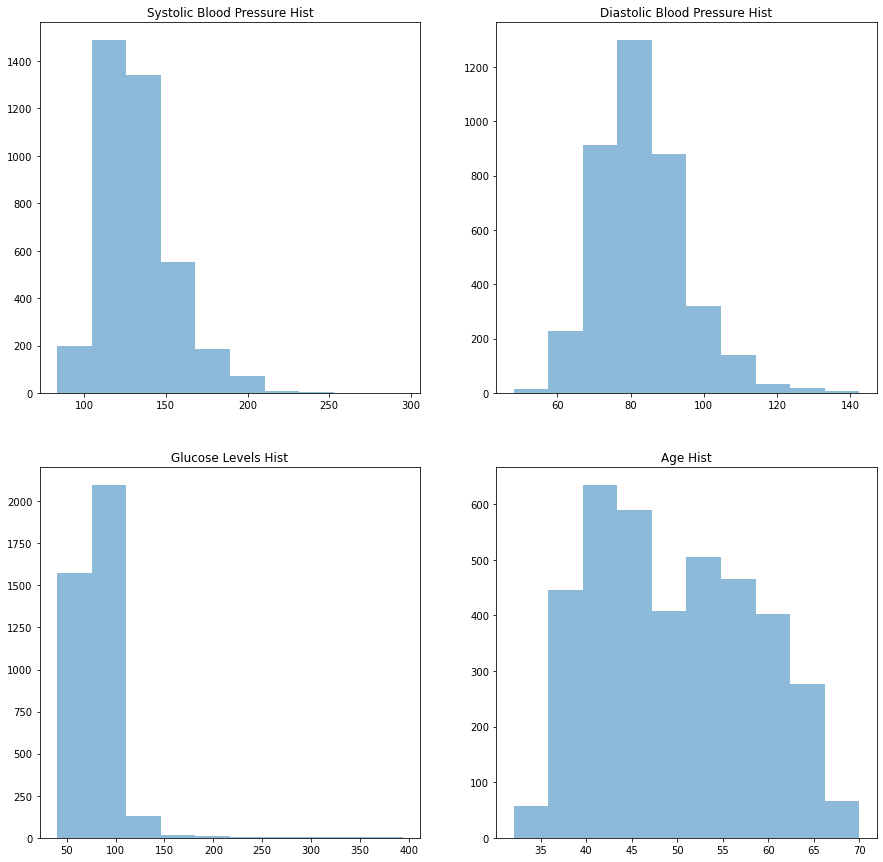

In [262]:
# Distribution 

HIGHSBP = Fram_data['Systolic Blood Pressure']

HIGHDBP = Fram_data['Diastolic Blood Pressure']

HIGHGL = Fram_data['Glucose Levels']

HIGHAge = Fram_data['Age']


plt.rcParams["figure.figsize"] = (15,15)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(HIGHSBP, alpha=0.5, label='HIGHSBP')
ax0.set_title('Systolic Blood Pressure Hist')

ax1.hist(HIGHDBP, alpha=0.5, label='HIGHDBP')
ax1.set_title('Diastolic Blood Pressure Hist')

ax2.hist(HIGHGL, alpha=0.5, label='HIGHGL')
ax2.set_title('Glucose Levels Hist')

ax3.hist(HIGHAge, alpha=0.5, label='HIGHAge')
ax3.set_title('Age Hist')
# Save the plot
plt.savefig('data/FramDistribution.png')
plt.show()

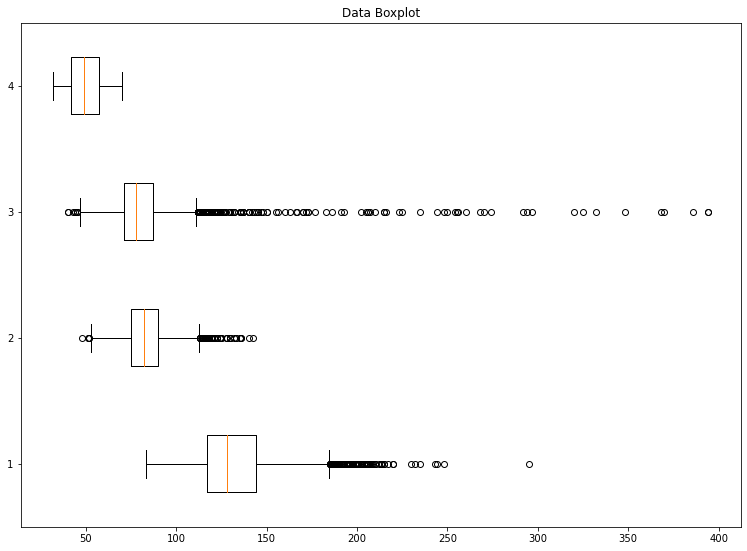

In [263]:
# Boxplot
data = [HIGHSBP, HIGHDBP, HIGHGL, HIGHAge]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, vert=False)

plt.title("Data Boxplot")
# save the plot
plt.savefig('data/FramBoxplot.png')
# show plot
plt.show()

## 2.6 How to reproduce?

The Framingham Heart Study, which followed patients for 30 years, agreed that systolic blood pressure (SBP) shows a continuous increase between the ages of 30 and 84 years or over. [14] To simulate the data I decided to recreate the data by age groups, 32 - 40, 40 - 50, 50 - 60, 60 - 70.

The loc attribute is used to group the rows and columns by 'Age' groups, 32 - 40, 40 - 50, 50 - 60, 60 - 70 in the Fram_data dataframe to get the Mean and Standard deviation for each Group in Systolic Blood Pressure, Diastolic Blood Pressure, Glucose Levels

    Group0 = Less than 40
    Group1 = 40 - 50
    Group2 = 50 - 60
    Group3 = 60 - 70

In [264]:
Group0 = Fram_data.loc[(Fram_data['Age'] <= 40)]
Group1 = Fram_data.loc[((Fram_data['Age'] > 40) & (Fram_data['Age'] <= 50))]
Group2 = Fram_data.loc[((Fram_data['Age'] > 50) & (Fram_data['Age'] <= 60))]
Group3 = Fram_data.loc[((Fram_data['Age'] > 60) & (Fram_data['Age'] <= 70))]

In [265]:
Group1.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,45.328071,127.987303,0.240906,82.330130,80.187371,0.017845
std,2.839476,18.282872,0.427780,11.352016,20.812511,0.132433
min,41.000000,90.000000,0.000000,52.000000,40.000000,0.000000
25%,43.000000,115.000000,0.000000,74.000000,71.000000,0.000000
50%,45.000000,126.000000,0.000000,81.000000,77.000000,0.000000
75%,48.000000,137.000000,0.000000,88.000000,85.000000,0.000000
max,50.000000,243.000000,1.000000,142.500000,348.000000,1.000000


In [266]:
Group1.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,45.328071,127.987303,0.240906,82.330130,80.187371,0.017845
std,2.839476,18.282872,0.427780,11.352016,20.812511,0.132433
min,41.000000,90.000000,0.000000,52.000000,40.000000,0.000000
25%,43.000000,115.000000,0.000000,74.000000,71.000000,0.000000
50%,45.000000,126.000000,0.000000,81.000000,77.000000,0.000000
75%,48.000000,137.000000,0.000000,88.000000,85.000000,0.000000
max,50.000000,243.000000,1.000000,142.500000,348.000000,1.000000


In [267]:
Group2.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,55.261643,138.114733,0.407282,85.165961,83.681626,0.036410
std,2.848751,22.442454,0.491536,12.204246,24.808868,0.187387
min,51.000000,83.500000,0.000000,51.000000,40.000000,0.000000
25%,53.000000,123.000000,0.000000,77.000000,72.000000,0.000000
50%,55.000000,134.500000,0.000000,84.000000,79.000000,0.000000
75%,58.000000,150.500000,1.000000,92.000000,88.000000,0.000000
max,60.000000,244.000000,1.000000,140.000000,325.000000,1.000000


In [268]:
Group3.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,63.576493,146.591418,0.542910,85.411381,87.475746,0.061567
std,2.096220,27.304788,0.498621,13.274108,36.537720,0.240592
min,61.000000,92.500000,0.000000,48.000000,45.000000,0.000000
25%,62.000000,126.000000,0.000000,76.500000,73.750000,0.000000
50%,63.000000,143.500000,1.000000,84.000000,80.000000,0.000000
75%,65.000000,163.000000,1.000000,93.000000,91.000000,0.000000
max,70.000000,295.000000,1.000000,136.000000,394.000000,1.000000


## 2.7 Mean and Standard Deviation By Age Group

The following are the results of the NumPy describe function for the different age groups for the mean and standard deviation:

### Systolic Blood Pressure	

    Less than 40
    mu, sigma = 121.005900, 14.527058	
    40 - 50
    mu, sigma = 127.987303, 18.282872	
    50 - 60
    mu, sigma = 138.114733, 22.442454	
    60 - 70
    mu, sigma = 146.591418, 27.304788	

### Diastolic Blood Pressure

    Less than 40
    mu, sigma = 78.382743, 10.187962	
    40 - 50
    mu, sigma = 82.330130, 11.352016	
    50 - 60
    mu, sigma = 85.165961, 12.204246	
    60 - 70
    mu, sigma = 85.411381, 13.274108	

### Glucose Levels	

    Less than 40
    mu, sigma = 78.430678, 12.497340	
    40 - 50
    mu, sigma = 80.187371, 20.812511	
    50 - 60
    mu, sigma = 83.681626, 24.808868	
    60 - 70
    mu, sigma = 87.475746, 36.537720

## 2.8 Count and percentage by value for by Age

To recreate the Age array, I have to identify the probabilities of occurrence for each element in the study. This requires counting how many times an age appears and getting the percentage associated.

In [269]:
## Count and percentage by value for a by Age [16]
s = Fram_data['Age']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(2)
df = pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

# Set the Age as a column and reset the index of the dataframe
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'Age'})
df

,Age,counts,per,per100
0,40,175,0.045431,4.54
1,46,169,0.043873,4.39
2,42,167,0.043354,4.34
3,48,157,0.040758,4.08
4,41,153,0.039720,3.97
5,39,152,0.039460,3.95
6,45,148,0.038422,3.84
7,44,148,0.038422,3.84
8,43,140,0.036345,3.63
9,52,134,0.034787,3.48


***

# 3. Simulate the Framingham Dataset

- Create a New Dataframe
- Populate 'Age' in the New Dataframe using random.choice with size of 3852
- Random Normal to populate 'Systolic Blood Pressure' 'Diastolic Blood Pressure' 'Glucose Levels'
- Populate 'Hypertensive' from output 'Systolic Blood Pressure'
- Populate 'Diabetes' from output 'Glucose Levels'
- Round data to one decimal place to match the output of Framingham 

## 3.1 Create a New Dataframe



In [270]:
# 3.1 Create a New Dataframe
NewFram = pd.DataFrame(columns=['Age', 'Systolic Blood Pressure', 'Hypertensive', 'Diastolic Blood Pressure', 'Glucose Levels', 'Diabetes'])
NewFram

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes


## 3.2 Use Random Choice to populate Age

To recreate the non-uniform data in 'Age' from section ***2.8 Count and percentage by value for by Age***, using the 'per' column to give the probabilities associated with each entry in 'Age'

In [271]:
# Sum the per column to check it is equal to 1
sum(df['per'])

0.9999999999999996

In [272]:
# Recreate the Age Column by using random choice 
p = df['per']
age = df['Age']

# Populate 'Age' in the New Dataframe using random.choice with size of 3852
NewFram['Age'] = np.random.choice(age, 3852, p=p)

# New Dataframe with 'Age' Column Populated
NewFram

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,44,NaN,NaN,NaN,NaN,NaN
1,42,NaN,NaN,NaN,NaN,NaN
2,38,NaN,NaN,NaN,NaN,NaN
3,60,NaN,NaN,NaN,NaN,NaN
4,36,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3847,66,NaN,NaN,NaN,NaN,NaN
3848,46,NaN,NaN,NaN,NaN,NaN
3849,36,NaN,NaN,NaN,NaN,NaN
3850,54,NaN,NaN,NaN,NaN,NaN


## 3.3 Use Random Normal to populate 'Systolic Blood Pressure' 'Diastolic Blood Pressure' 'Glucose Levels'

The mean and standard deviation for each age group in section ***2.6 How to reproduce?***  is used to recreate the data set. The three functions use the Age in the new Dataframe to populate  'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Glucose Levels' using numpy.normal

In [273]:
# Function to populate the new Dataframe 'Systolic Blood Pressure' 'Diastolic Blood Pressure' 'Glucose Levels'

# 2.6 Mean and Standard Deviation By Age Group for 'Systolic Blood Pressure'
#   Less than 40
#   mu, sigma = 121.00, 14.52	
#    40 - 50
#    mu, sigma = 127.98, 18.28	
#    50 - 60
#    mu, sigma = 138.11, 22.44	
#    60 - 70
#    mu, sigma = 146.59, 27.30	
def sbp_level(sbp):
    if sbp <= 40:
        return np.random.normal(121.00, 14.52)
    if sbp > 40 <= 50:
        return np.random.normal(127.98, 18.28)
    if sbp > 50 <= 60:
        return np.random.normal(138.11, 22.44)
    if sbp > 60 <= 70:
        return np.random.normal(146.59, 27.30)

# 2.6 Mean and Standard Deviation By Age Group for 'Diastolic Blood Pressure'
#    Less than 40
#    mu, sigma = 78.38, 10.18	
#    40 - 50
#    mu, sigma = 82.33, 11.35	
#    50 - 60
#    mu, sigma = 85.16, 12.20	
#    60 - 70
#    mu, sigma = 85.41, 13.27	
def dbp_level(dbp):
    if dbp <= 40:
        return np.random.normal(78.38, 10.18)
    if dbp > 40 <= 50:
        return np.random.normal(82.33, 11.35)
    if dbp > 50 <= 60:
        return np.random.normal(85.16, 12.20)
    if dbp > 60 <= 70:
        return np.random.normal(85.41, 13.27)

# 2.6 Mean and Standard Deviation By Age Group for 'Glucose Levels '
#    Less than 40
#    mu, sigma = 78.43, 12.49	
#    40 - 50
#    mu, sigma = 80.18, 20.81	
#    50 - 60
#    mu, sigma = 83.68, 24.80	
#    60 - 70
#    mu, sigma = 87.47, 36.53
def gl_level(gl):
    if gl <= 40:
        return np.random.normal(78.43, 12.49)
    if gl > 40 <= 50:
        return np.random.normal(80.18, 20.81)
    if gl > 50 <= 60:
        return np.random.normal(83.68, 24.80)
    if gl > 60 <= 70:
        return np.random.normal(87.47, 36.53)

NewFram['Systolic Blood Pressure'] = NewFram['Age'].apply(sbp_level)
NewFram['Diastolic Blood Pressure'] = NewFram['Age'].apply(dbp_level)
NewFram['Glucose Levels'] = NewFram['Age'].apply(gl_level)

NewFram

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,44,152.712898,NaN,71.190766,44.622205,NaN
1,42,139.598982,NaN,74.774840,56.490432,NaN
2,38,137.486995,NaN,74.737427,82.307813,NaN
3,60,138.118367,NaN,76.220525,92.872027,NaN
4,36,118.958838,NaN,57.663073,59.863737,NaN
...,...,...,...,...,...,...
3847,66,111.718089,NaN,69.114564,117.902796,NaN
3848,46,143.642400,NaN,93.721862,60.173078,NaN
3849,36,133.460705,NaN,57.842737,71.390713,NaN
3850,54,131.387828,NaN,72.105814,45.707540,NaN


## 3.4 Populate 'Hypertensive' 'Diabetes'

In section ***1.4 What to recreate*** research showed the different levels for Hypertensive and Diabetes. To fully populate the dataset two function are used. 

- Hypertensive uses the random normal systolic blood pressure to output a one or a zero. If below 180 the output is 0, if above 180 output 1
- Diabetes uses the random normal glucose levels to output a one or a zero. If below 126 the output is 0, if above 126 output 1

In [274]:
# Create a function for Hypertensive
# systolic blood pressure
# Normal <= 120
# Elevated 120 - 180
# Hypertensive >= 180

def Hyper_level(Hyper):
    if Hyper < 180:
        return 0
    if Hyper >= 180:
        return 1

# Create a function for glucose levels
# glucose levels
# normal <= 100
# impaired 101 - 126
# diabetic > 126

def Diabetes_level(Diabetic):
    if Diabetic < 126:
        return 0
    if Diabetic >= 126:
        return 1

NewFram['Hypertensive'] = NewFram['Systolic Blood Pressure'].apply(Hyper_level)
NewFram['Diabetes'] = NewFram['Glucose Levels'].apply(Diabetes_level)

NewFram

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
0,44,152.712898,0,71.190766,44.622205,0
1,42,139.598982,0,74.774840,56.490432,0
2,38,137.486995,0,74.737427,82.307813,0
3,60,138.118367,0,76.220525,92.872027,0
4,36,118.958838,0,57.663073,59.863737,0
...,...,...,...,...,...,...
3847,66,111.718089,0,69.114564,117.902796,0
3848,46,143.642400,0,93.721862,60.173078,0
3849,36,133.460705,0,57.842737,71.390713,0
3850,54,131.387828,0,72.105814,45.707540,0


Round the Systolic Blood Pressure, Diastolic Blood Pressure and Glucose Levels to one decimal place to match output of Farmington 

In [275]:
# Round data 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html

NewFram = NewFram.round({'Systolic Blood Pressure': 1, 'Diastolic Blood Pressure': 1, 'Glucose Levels': 1})

***

# 4. Conclusion

To conclude that the correct packages of NumPy.random (choice and normal) is the most suited to their likely distributions for selected variables. 

- The output of the describe function on both datasets
- A 4 x 4 Histogram overlay the Numpy.random simulated data over the real-world data.
- A pair plot of both datasets

In [276]:
# The output of the describe function on both datasets
NewFram.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,49.831256,126.934813,0.003375,81.362409,79.904309,0.009865
std,8.637335,17.937240,0.058003,11.051162,19.339054,0.098844
min,32.000000,62.600000,0.000000,40.600000,10.900000,0.000000
25%,42.000000,114.600000,0.000000,74.100000,67.175000,0.000000
50%,49.000000,127.000000,0.000000,81.300000,80.000000,0.000000
75%,57.000000,138.700000,0.000000,88.900000,92.125000,0.000000
max,70.000000,192.500000,1.000000,119.900000,148.300000,1.000000


In [277]:
# The output of the describe function on both datasets
Fram_data.describe()

,Age,Systolic Blood Pressure,Hypertensive,Diastolic Blood Pressure,Glucose Levels,Diabetes
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,49.638629,132.452233,0.312825,82.933541,81.963655,0.027259
std,8.597086,22.128090,0.463704,11.968874,23.954335,0.162857
min,32.000000,83.500000,0.000000,48.000000,40.000000,0.000000
25%,42.000000,117.000000,0.000000,75.000000,71.000000,0.000000
50%,49.000000,128.000000,0.000000,82.000000,78.000000,0.000000
75%,57.000000,144.000000,1.000000,90.000000,87.000000,0.000000
max,70.000000,295.000000,1.000000,142.500000,394.000000,1.000000


The 4 x 4 Histogram overlay the Numpy.random simulated data over the real-world data.

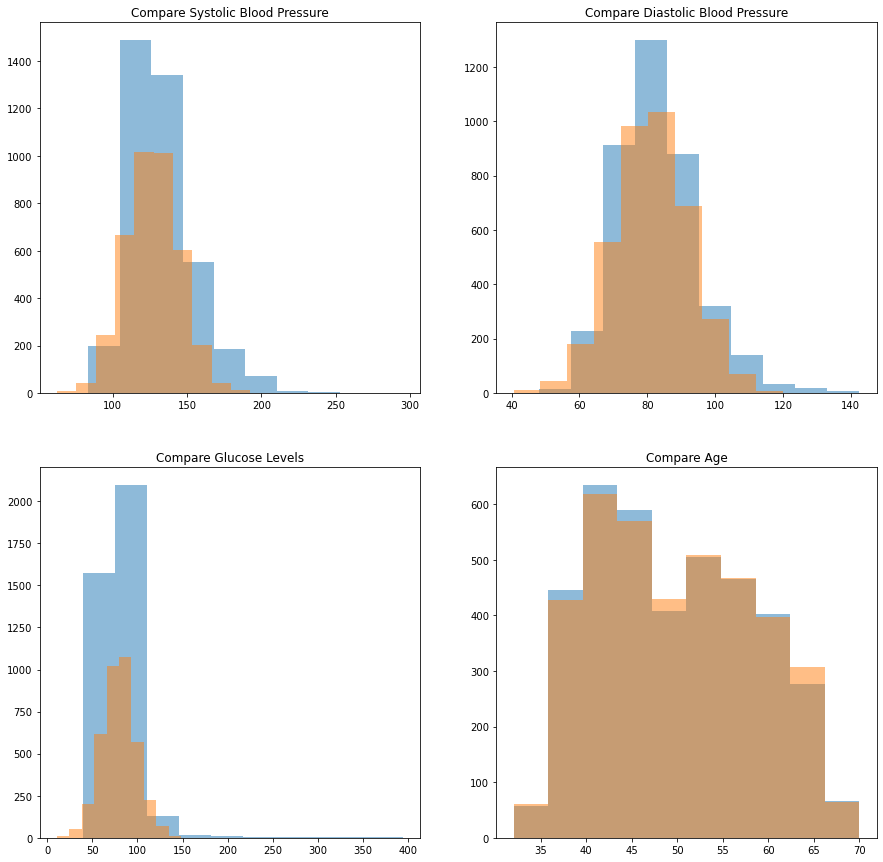

In [278]:
# The 4 x 4 Histogram overlay the Numpy.random simulated data over the real-world data.
# https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html
# https://gist.github.com/raggleton/828131c3e11bde0d29c7
# https://stackoverflow.com/questions/43160575/how-to-create-an-array-from-two-columns-in-pandas


HIGHSBP = Fram_data['Systolic Blood Pressure']
NewSBP = NewFram['Systolic Blood Pressure']

HIGHDBP = Fram_data['Diastolic Blood Pressure']
NewDBP = NewFram['Diastolic Blood Pressure']

HIGHGL = Fram_data['Glucose Levels']
NewGL = NewFram['Glucose Levels']

HIGHAge = Fram_data['Age']
NewAge = NewFram['Age']

plt.rcParams["figure.figsize"] = (15,15)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(HIGHSBP, alpha=0.5, label='HIGHSBP')
ax0.hist(NewSBP, alpha=0.5, label='NewSBP')
ax0.set_title('Compare Systolic Blood Pressure')

ax1.hist(HIGHDBP, alpha=0.5, label='HIGHDBP')
ax1.hist(NewDBP, alpha=0.5, label='NewDBP')
ax1.set_title('Compare Diastolic Blood Pressure')

ax2.hist(HIGHGL, alpha=0.5, label='HIGHGL')
ax2.hist(NewGL, alpha=0.5, label='NewGL')
ax2.set_title('Compare Glucose Levels')

ax3.hist(HIGHAge, alpha=0.5, label='HIGHAge')
ax3.hist(NewAge, alpha=0.5, label='NewAge')
ax3.set_title('Compare Age')

plt.savefig('data/Comparedataframes.png')
plt.show()


A pairplot of Framingham Heart Study Data

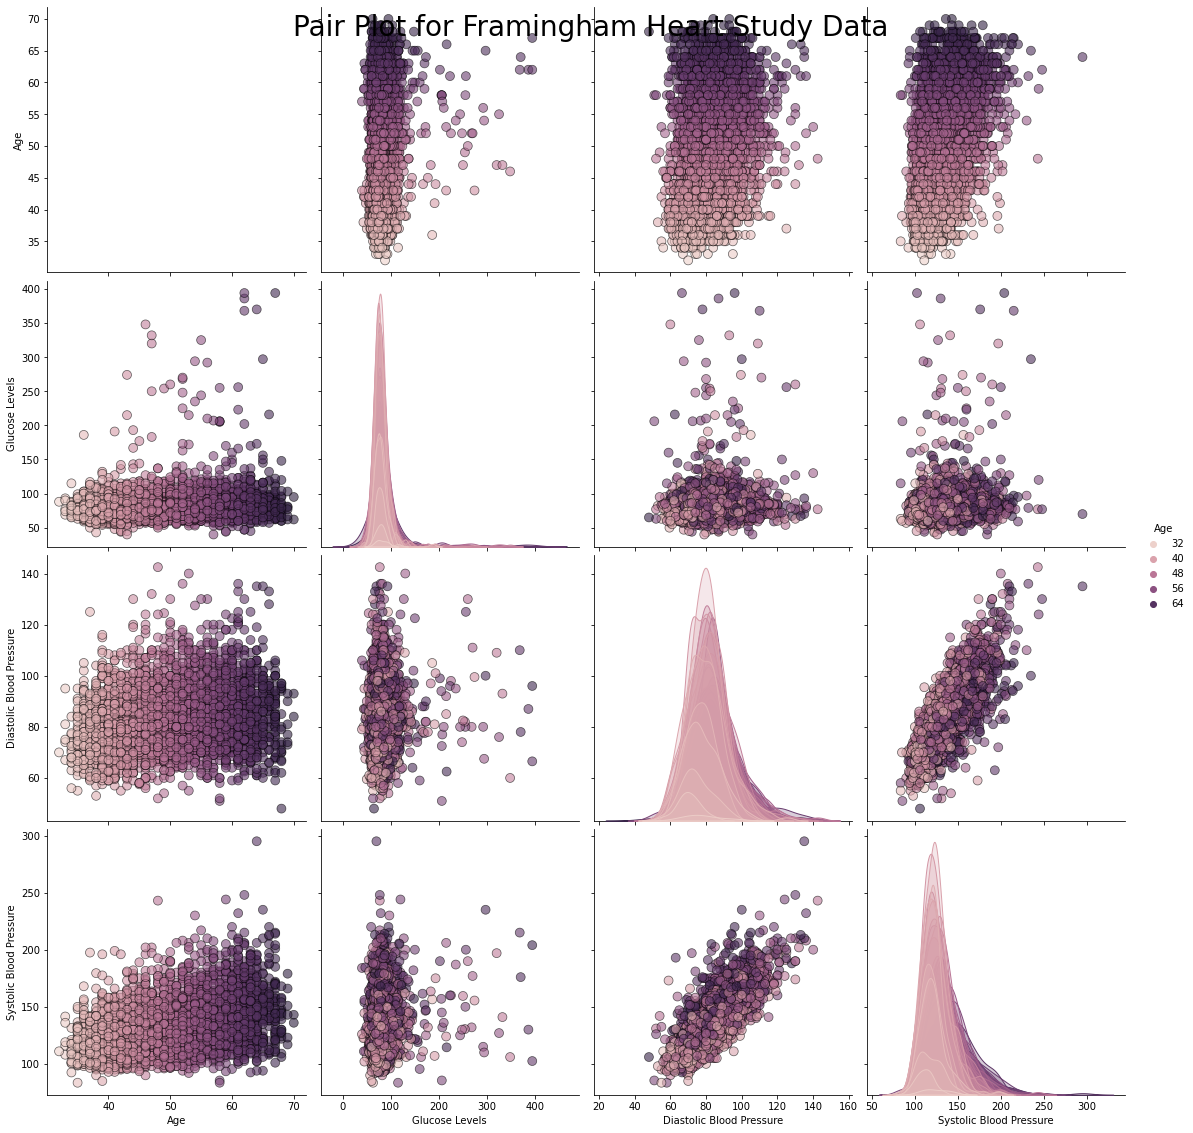

In [279]:
# Seaborn pairplot of Framingham Heart Study Data

sns.pairplot(Fram_data,
             vars = ['Age','Glucose Levels','Diastolic Blood Pressure','Systolic Blood Pressure'], 
             hue='Age', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.suptitle('Pair Plot for Framingham Heart Study Data', size = 28)

plt.savefig('data/pairplotFram.png')


A pairplot of simulated data.

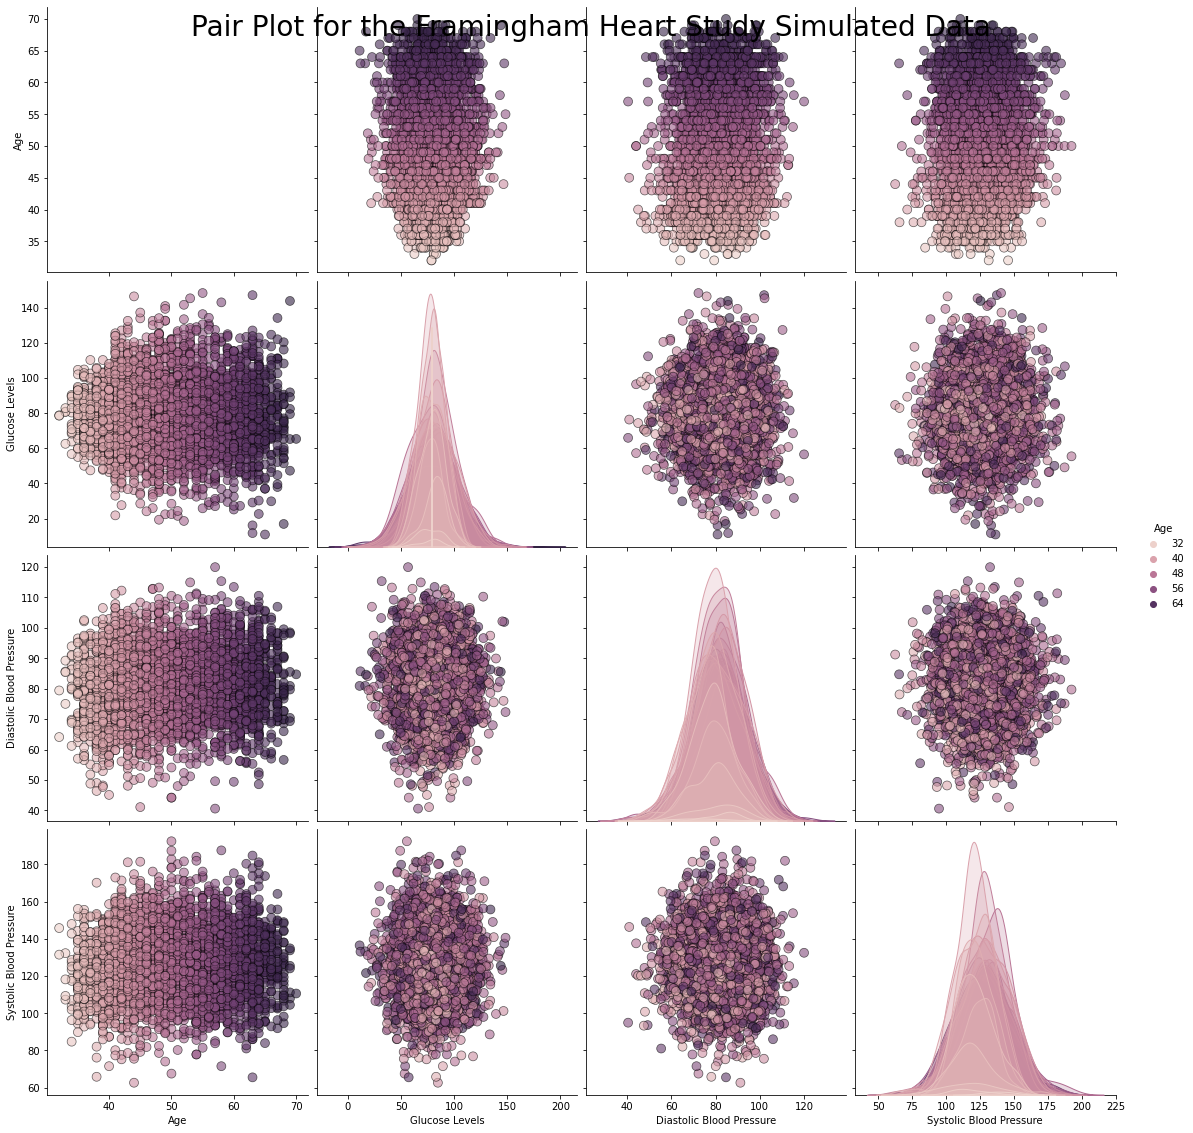

In [280]:
# Seaborn pairplot of simulated data.

sns.pairplot(NewFram, 
             vars = ['Age','Glucose Levels','Diastolic Blood Pressure','Systolic Blood Pressure'], 
             hue='Age', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.suptitle('Pair Plot for the Framingham Heart Study Simulated Data', size = 28)

plt.savefig('data/pairplotNewFram.png')

## Conclusion

The output using the described function for both datasets demonstrate only minor changes in Mean and standard deviation. The outlier in Systolic Blood Pressure and Glucose Levels affect the outcome of Hypertensive and Diabetes respectively.

The comparison of the both sets of data can be visualised with the plots

### The 4 x 4 Histogram overlay the Numpy.random simulated data over the real-world data.:

	Compare Systolic Blood Pressure
	This is a normal distribution, outliers are not accounted for in the simulated data

	Compare Diastolic Blood Pressure
	This is a normal distribution

	Compare Glucose Levels
	This is a normal distribution, outliers are not accounted for in the simulated data

	Compare Age:
	I could have used uniform data for this section, to replicate the 'Age' I decided to recreate using non-uniform and the probabilities associated with each entry.


### A pair plot of both datasets:
	
	Scatter plots are used to observe relationships between variables. The four by four matrix illustrates the normal distribution of the data. The scatterplot clearly shows the simulated data does not account for the outliers in Systolic Blood Pressure and Glucose Levels.


### Conclusion:

Numpy.random is a useful tool for a data analyst to simulated data.  

# 5. References 

[1] https://www.bbc.co.uk/bitesize/guides/zvxp34j/revision/3

[2] https://nfb.org//sites/default/files/images/nfb/publications/vodold/vspr9804.htm

[3] https://github.com/TarekDib03/Analytics/blob/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv

[4] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

[5] https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

[6] https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/

[7] https://statisticsglobe.com/drop-rows-blank-values-from-pandas-dataframe-python

[8] https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

[9] https://www.kaggle.com/micahshull/python-heart-disease-framingham

[10] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

[11] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

[12] https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/

[13] https://statisticsglobe.com/drop-rows-blank-values-from-pandas-dataframe-python

[14] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2805932/

[15] https://github.com/TarekDib03/Analytics/blob/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv

[16] https://blog.softhints.com/pandas-count-percentage-value-column/

[17] https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers

[18] https://academic.oup.com/aje/article/163/4/342/103626

[19] https://medlineplus.gov/bloodsugar.html